# Predict Liver Disease

## Part 1 - Data Acquisition
_______________________________________________________________________________________________________________________________

**1. Setup libraries**

The libraries use in the study was imported.

In [1]:
#Manipulate data 
import numpy as np 
import pandas as pd 

#View graphs 
import seaborn as sns
from matplotlib import pyplot as plt

# split train and test dataset 
from sklearn.model_selection import train_test_split

# Perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Machine Learning Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Statistical Test 
from scipy import stats


#Evaluate the model 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

#Ignore Warnings 
import warnings
warnings.filterwarnings("ignore")

#Save the model
import joblib 
import pickle

In [2]:
#Setting of graphs 
from matplotlib import rcParams
rcParams['figure.figsize']=12,4
rcParams['lines.linewidth']=3
rcParams['xtick.labelsize']='x-large'
rcParams['ytick.labelsize']='x-large'

**2. Download raw data**

In [3]:
# Load the file 
ds = pd.read_csv("Indian_Liver_Patient_Dataset.csv")

## Part 2 - Data Wrangling
_______________________________________________________________________________________________________________________________

- Its a important step to transform "raw data" in a appropiate formart to analyse 
- It will be verified the types of variables, duplicate values, two  results in the same column, outiliers and na values.

**1. Shape**

In [4]:
# shape 
ds.shape

(582, 11)

**2. View Data**

In [5]:
ds.head()
#How the dataset is unnamed, it was necessary name the columns.

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


**3 . Name the colums**

In [6]:
ds.columns =["age","gender","total_bilirubin","direct_bilirubin","alkaline_phosphotase","alamine_aminotransferase",
           "aspartate_aminotransferase","total_proteins","albumin","ratio_albumin_and_globulin_ratio","target"]

In [7]:
ds.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


**4 . Types of variables**

In [8]:

ds.dtypes
#We have two types of variables, categorical and numerica

age                                   int64
gender                               object
total_bilirubin                     float64
direct_bilirubin                    float64
alkaline_phosphotase                  int64
alamine_aminotransferase              int64
aspartate_aminotransferase            int64
total_proteins                      float64
albumin                             float64
ratio_albumin_and_globulin_ratio    float64
target                                int64
dtype: object

**5 . Checking merged results**

In [9]:
ds.head()
#As show below, there aren't two values at the same column.

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


**6 . Duplicated values**

In [10]:
ds[ds.duplicated(keep=False)].count()
# As show below was identified 26 duplicate values 
# We need to remove them since can be a problem for the model. 

age                                 26
gender                              26
total_bilirubin                     26
direct_bilirubin                    26
alkaline_phosphotase                26
alamine_aminotransferase            26
aspartate_aminotransferase          26
total_proteins                      26
albumin                             26
ratio_albumin_and_globulin_ratio    26
target                              26
dtype: int64

In [11]:
ds1 = ds.drop_duplicates()

In [12]:
#Check if the duplicate values were removed 
ds1[ds1.duplicated(keep=False)].count()

age                                 0
gender                              0
total_bilirubin                     0
direct_bilirubin                    0
alkaline_phosphotase                0
alamine_aminotransferase            0
aspartate_aminotransferase          0
total_proteins                      0
albumin                             0
ratio_albumin_and_globulin_ratio    0
target                              0
dtype: int64

In [13]:
# shape 
ds1.shape

(569, 11)

**7. Outiliers**

- To analyse outliers, it's necessary to do the spliting of data.
- The analyse takes into account the boxplot graphs and descriptive analyse.
- Data was splitted in numerical and categorical dataset.

In [14]:
#numerical
ds_numerical= ds1.select_dtypes(include=np.number)

In [15]:
ds_numerical.head()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [16]:
#categorical 
ds_categorical = ds.select_dtypes(include=np.object_)
ds_categorical 

,gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
577,Male
578,Male
579,Male
580,Male


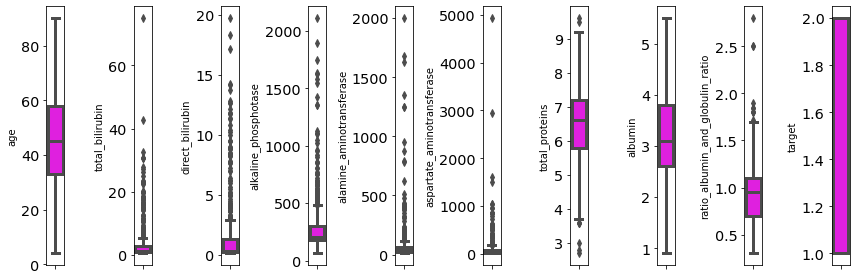

In [17]:
ncol = ds_numerical.columns
features = ncol
for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(y=ds_numerical[features[i]],color='magenta',orient='v')
    plt.tight_layout()

- According with the graph we have the most of variables with outliers. However, it's important to analyse the frequency for each feature and the descriptive analyses 

In [18]:
#Descriptive analyses
ds1.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,565.000000,569.000000
mean,44.813708,3.326362,1.500000,291.934974,79.840070,109.541301,6.495782,3.148682,0.948088,1.288225
std,16.234432,6.272490,2.835117,245.468274,181.611654,291.111322,1.089183,0.797489,0.319912,0.453335
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [19]:
#Frequency 
def count_max_frequency(dataframe):
    max_frequency = {}
    for col in dataframe.columns:
        maximo=dataframe[col].max()
        max_value = dataframe[col].value_counts().loc[maximo]
        max_frequency[col] = (maximo,max_value)
    return max_frequency

In [20]:
count_max_frequency(ds_numerical)

{'age': (90, 1),
 'total_bilirubin': (75.0, 1),
 'direct_bilirubin': (19.7, 1),
 'alkaline_phosphotase': (2110, 1),
 'alamine_aminotransferase': (2000, 1),
 'aspartate_aminotransferase': (4929, 1),
 'total_proteins': (9.6, 1),
 'albumin': (5.5, 2),
 'ratio_albumin_and_globulin_ratio': (2.8, 1),
 'target': (2, 164)}

- According the count above, we have a small frequency for the max. number(outlier). So , the frequency can't be considered to 
 remove the outlier. Nevertheless, when we compare the distance between these values and mean, it noticed that for the variable 
aspartate_aminotransferase , we have an possible outilier, the value 4929 is so far from the media. Therefore, these results will be removed. 

In [21]:
ds2=ds1[ds1.aspartate_aminotransferase<3000]

In [22]:
ds2.shape

(568, 11)

In [23]:
ds2.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.776408,3.312324,1.492782,290.494718,77.779930,101.056338,6.494894,3.150000,0.948883,1.288732
std,16.224321,6.269066,2.832378,243.266447,174.990761,209.423245,1.089937,0.797571,0.319638,0.453573
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.955000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.250000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,2946.000000,9.600000,5.500000,2.800000,2.000000


<AxesSubplot:xlabel='aspartate_aminotransferase'>

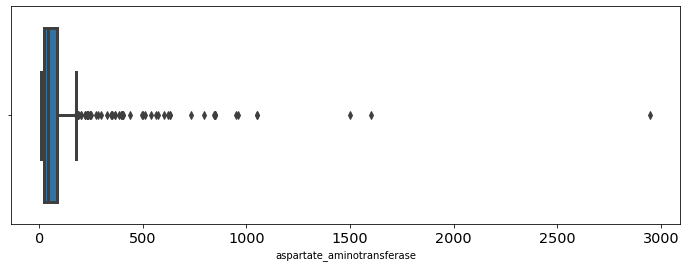

In [24]:
sns.boxplot(ds2.aspartate_aminotransferase)

- As showed in the graph, we still have a possible outlier, to decide its removal, the frequency will be avaluate

In [25]:
count_max_frequency(ds2)

{'age': (90, 1),
 'gender': ('Male', 429),
 'total_bilirubin': (75.0, 1),
 'direct_bilirubin': (19.7, 1),
 'alkaline_phosphotase': (2110, 1),
 'alamine_aminotransferase': (2000, 1),
 'aspartate_aminotransferase': (2946, 1),
 'total_proteins': (9.6, 1),
 'albumin': (5.5, 2),
 'ratio_albumin_and_globulin_ratio': (2.8, 1),
 'target': (2, 164)}

- As we have a low frequency, this value 2946 will be removed :

In [26]:
ds3 = ds2[ds2.aspartate_aminotransferase<2000]

In [27]:
ds3.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,563.000000,567.000000
mean,44.798942,3.295767,1.484480,290.664903,74.389771,96.038801,6.496296,3.149735,0.948259,1.289242
std,16.229748,6.262160,2.827953,243.447407,155.358328,172.077111,1.090387,0.798251,0.319578,0.453811
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,2.000000


**8. NA Values**

In [28]:
#Are the na values?
ds3.isnull().values.any()

True

In [29]:
#What colums?
ds3.isnull().any()

age                                 False
gender                              False
total_bilirubin                     False
direct_bilirubin                    False
alkaline_phosphotase                False
alamine_aminotransferase            False
aspartate_aminotransferase          False
total_proteins                      False
albumin                             False
ratio_albumin_and_globulin_ratio     True
target                              False
dtype: bool

In [30]:
#How many?
ds3.isnull().sum()

age                                 0
gender                              0
total_bilirubin                     0
direct_bilirubin                    0
alkaline_phosphotase                0
alamine_aminotransferase            0
aspartate_aminotransferase          0
total_proteins                      0
albumin                             0
ratio_albumin_and_globulin_ratio    4
target                              0
dtype: int64

In [31]:
#show na values
ds3[ds3.isnull().values]

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
208,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
240,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
252,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
311,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


- how is only 4 lines, it will be removed:

In [33]:
ds4=ds3.dropna(how='any')

In [34]:
ds4.shape

(563, 11)

## Part 3 - Exploratory analyses
_______________________________________________________________________________________________________________________________

We have two types of analyses:  
 - univariate-  analyse one one feature
 - bivariate - variables will be compare with the target.

To explore the data, the dataset was splitted in numerical and categorical

**1. Numerical Analyses - Univariate**

In [35]:
ds_numerical1= ds4.select_dtypes(include=np.number)

Descriptive analyses 

In [36]:

ds_numerical1.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,44.836590,3.312789,1.492718,291.477798,74.769094,96.458259,6.494849,3.146359,0.948259,1.287744
std,16.262688,6.281095,2.836267,244.090958,155.844057,172.611560,1.089610,0.797193,0.319578,0.453114
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.500000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,2.000000


Histograms

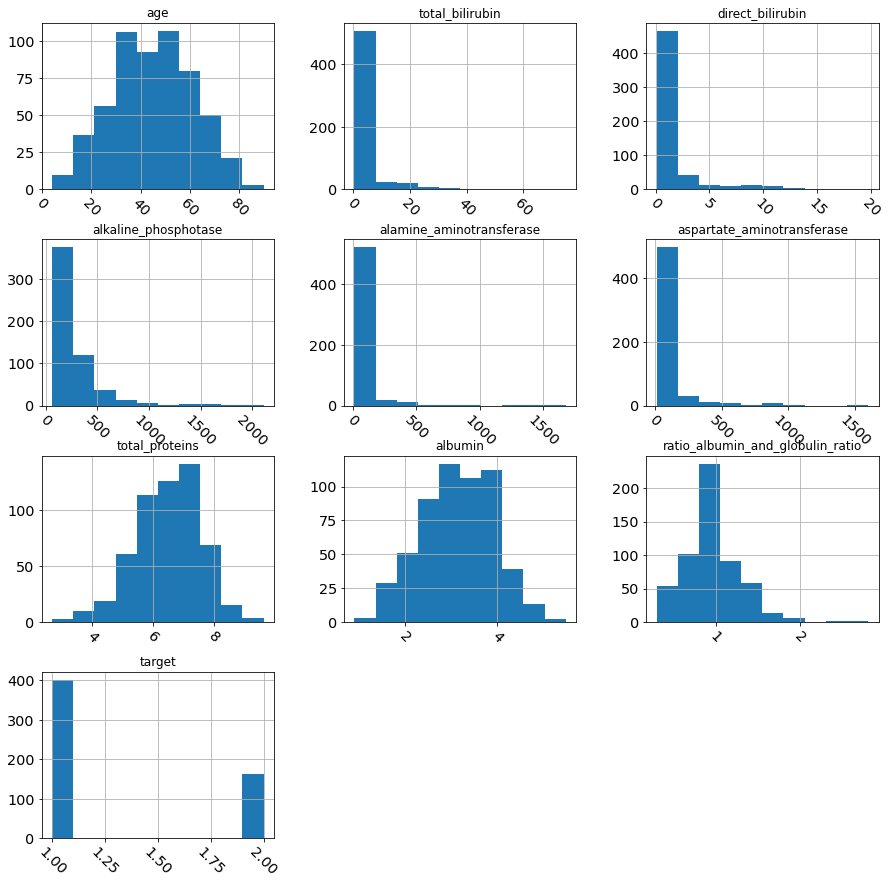

In [37]:
ds_numerical1.hist(figsize=(15,15),xrot=-45,bins=10)
plt.show()

- Age, total_proteins  and albumin - seems to follow a normal distribution 
- To check this, it was done the normality test: 

In [38]:
#Age 
alpha =0.05
k2,p=stats.normaltest(ds_numerical1['age'])

if p < alpha:
    print("The null hypothesis can be rejected, because the p value is :{} ".format(p))
else:
    print("The null hypothesis cannot be rejected,because the p value  is: {} ".format(p))
    

The null hypothesis can be rejected, because the p value is :0.0007418843860438111 


- P value was less then our significance level, so the probability of getting data like this is small. 
- Therefore, we can conclude that age doesn't follow a normal distribuiton.

In [39]:
#total_proteins
alpha =0.05
k2,p=stats.normaltest(ds_numerical1['total_proteins'])
if p < alpha:
    print("The null hypothesis can be rejected, because the p value is :{} ".format(p))
else:
    print("The null hypothesis cannot be rejected,because the p value  is: {} ".format(p))

The null hypothesis can be rejected, because the p value is :0.004541880071984804 


- P value was less then our significance level, so the probability of getting data like this is small. 
- Therefore, we can conclude that age doesn't follow a normal distribuiton.

In [40]:
#albumin
alpha =0.05
k2,p=stats.normaltest(ds_numerical['albumin'])
if p < alpha:
    print("The null hypothesis can be rejected, because the p value is :{} ".format(p))
else:
    print("The null hypothesis cannot be rejected,because the p value  is: {} ".format(p))

The null hypothesis cannot be rejected,because the p value  is: 0.07373089474989515 


- P value was more then our significance level, so the probability of getting data like this is small. 
- Therefore, we can conclude that albumin follow a normal distribuiton.

As the most of variables don't follow a normal distribution could be necessary treat the data before of applying the model.

**2. Numerical Analyses - Bivariate**

- To bivariate analyse, it was used the method of Correlation.
- The value of correlation is between -1 and 1, values near this numbers indicate a strong relationship whereas values next to 0 indicate a weak relationship.
- To  machine learning models, it's important that the variables don't show strong correlation with each other due to multicollinearity problem. Nevertheless, it's import to have correlation with the target.

<AxesSubplot:>

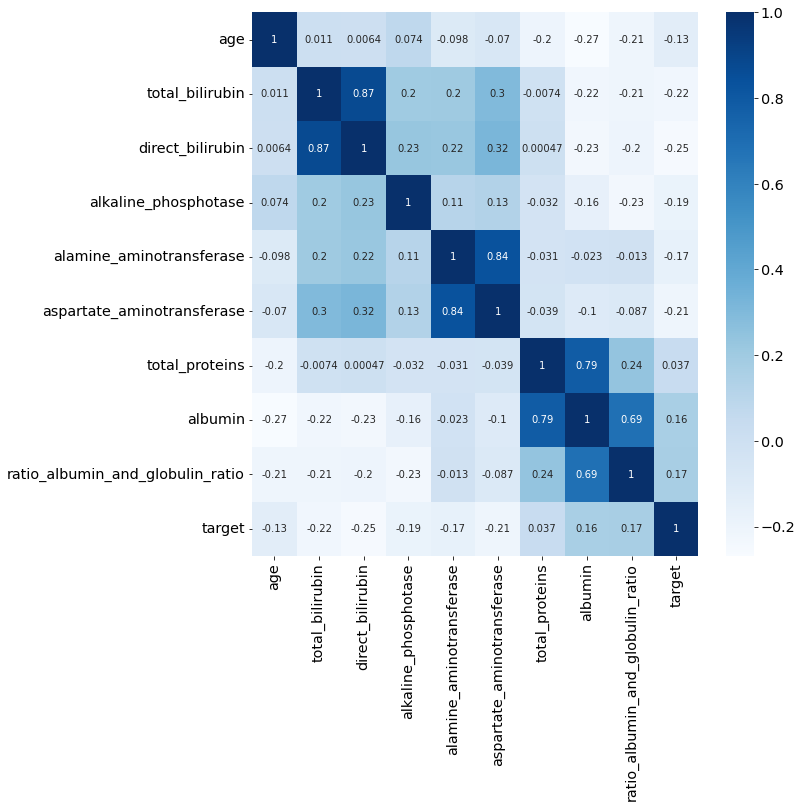

In [41]:
plt.figure(figsize= (10,10))
sns.heatmap(ds_numerical1.corr(),cmap='Blues',annot=True)

- It possible noticed at the graph that we have indications of multicollienarity in :
 - total_bilirubin and direct_bilirubin have a correlation of 0.87
 - aspartate_aminotransferase and alamine _aminotransferase have a correlation of 0.84
 - total_proteins and albumin have a correlation of 0.79
 
- Multicollinearity could be a problem because undermines the statistical significance of a independent variable. 
- Therefore, it's important to solve this question before of applying the model. 

Adjust the target variable

- By convenction, it will be adjust the number of target variable from 2 (no disease) to 0.

In [42]:

def adj (x):
    if x==2:
        return 0
    return 1
ds4['target']=ds4['target'].map(adj)

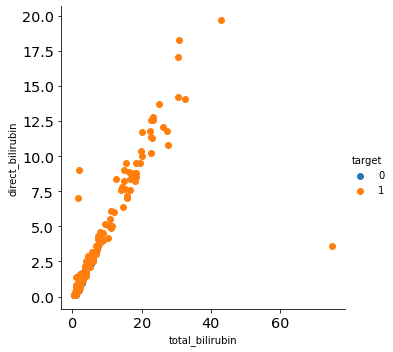

In [43]:
#total_bilirubin and direct_bilirubin
sns.FacetGrid(ds4,hue='target', size=5).map(plt.scatter,'total_bilirubin','direct_bilirubin').add_legend()

- It was done a scatter plot to prove the strong relation between the variables and with the target.
- As the two variables are talking the same things, we can use one or other. 

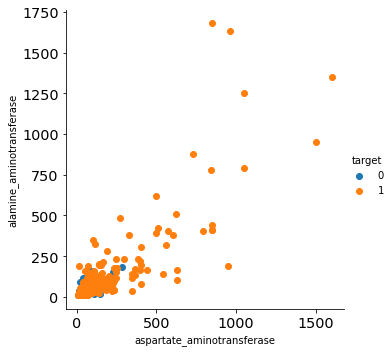

In [44]:
#aspartate_aminotransferase and alamine _aminotransferase
sns.FacetGrid(ds4,hue='target',size=5).map(plt.scatter,'aspartate_aminotransferase','alamine_aminotransferase').add_legend()

- Despite showing multicolinearity, according the graph above there isn't a deep linear relation, between the variables.
- So, it will kept the two variables in the analyse.

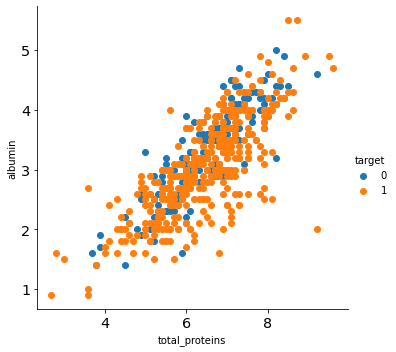

In [45]:
#total_proteins and albumin
sns.FacetGrid(ds4,hue='target',size=5).map(plt.scatter,'total_proteins','albumin').add_legend()

- the scatter plot  prove the strong relation between the variables. However, as the aumont  inside target variable are balanced
- it was decided keep it

**3. Categorical variable**

In [46]:
ds_categorical1 = ds4.select_dtypes(include=np.object_)
ds_categorical1

,gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
577,Male
578,Male
579,Male
580,Male


In [47]:
ds_categorical1.describe()

,gender
count,563
unique,2
top,Male
freq,426


<AxesSubplot:xlabel='count', ylabel='gender'>

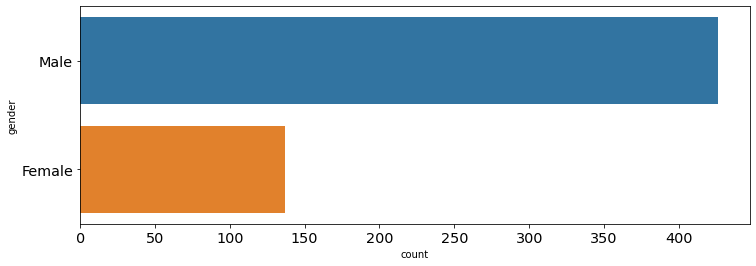

In [48]:
sns.countplot(data=ds_categorical1, y='gender',label='Count')

- According the graph,we have more male than female, it could be a problem because after the costruction of model,
- Its use may be work better with the male gender. However, as gender is not a target variable, it will not applied the balancing. 
- The ideal is to gather more data from female gender, what isn't possible for this work.

## Part 4 - Preprocessing
_______________________________________________________________________________________________________________________________

**1. Removing variable**

- As total_bilirubin and direct_bilirubin represent the same thing, it will be removed direct_bilirubin (less global) 

In [49]:
ds5 = ds4.drop('direct_bilirubin',1)

In [50]:
ds5.head()

,age,gender,total_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,Male,10.9,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,208,19,14,7.6,4.4,1.30,1


**2.Feature engineering**

- Before of split the dataset it's import transform all strings in numerical data 
- Therefore, the gender variable will be transformed in numerical
- By convenction, it will be adjust the number of target variable from 2 (no disease) to 0.

In [51]:
def numero (x):
    if x == 'Male':
        return 0
    return 1
ds5['gender'] =ds5['gender'].map(numero)

In [52]:
#Check if it's ok:
ds5.head()

,age,gender,total_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,0,10.9,699,64,100,7.5,3.2,0.74,1
1,62,0,7.3,490,60,68,7.0,3.3,0.89,1
2,58,0,1.0,182,14,20,6.8,3.4,1.00,1
3,72,0,3.9,195,27,59,7.3,2.4,0.40,1
4,46,0,1.8,208,19,14,7.6,4.4,1.30,1


**3.Split dataset**

- To apply machine learning models, it will be necessary to split the dataset in train and test as well as sort out target variables from input variables.

In [53]:
#target variable 
y = ds5.target
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
577    0
578    1
579    1
580    1
581    0
Name: target, Length: 563, dtype: int64


In [54]:
#input variables 
x= ds5.drop('target',axis=1)
print(x)

     age  gender  total_bilirubin  alkaline_phosphotase  \
0     62       0             10.9                   699   
1     62       0              7.3                   490   
2     58       0              1.0                   182   
3     72       0              3.9                   195   
4     46       0              1.8                   208   
..   ...     ...              ...                   ...   
577   60       0              0.5                   500   
578   40       0              0.6                    98   
579   52       0              0.8                   245   
580   31       0              1.3                   184   
581   38       0              1.0                   216   

     alamine_aminotransferase  aspartate_aminotransferase  total_proteins  \
0                          64                         100             7.5   
1                          60                          68             7.0   
2                          14                          20   

- Split x and y into train and test:

In [55]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 1234, stratify = ds5.target )

- test_size of 25% data for test and 70% data for train 
- random_state -  it was put to assure that the aleatory process start always with the same pattern but in each execution will  be aleatory.
- stratify - to do a stratify sampling 

In [56]:
#print shape 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(422, 9) (141, 9) (422,) (141,)


**4.Class balancing**

- When we are dealing with class is extremely important to see if the classes are unbalanced beacuse it can  affect the generalization of the model.

In [57]:
#Checking target variable 
fa = round(y.value_counts(normalize=True)*100)
fa

1    71.0
0    29.0
Name: target, dtype: float64

- As show above the dataset is unbalanced, so it will be ncessary to do the balancing 
- We have two approaches: 
  - Undersampling - reduce the number of majoritary class, the problem is that the lenght of dataset will be reduced
  - Oversampling - increase the number of minority class through creation of sintetic datas, using  existing data

- As we have a dataset with little data it will be chosen the oversampling method

SMOTE - Oversampling method

In [58]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import imblearn

In [60]:
from imblearn.over_sampling import SMOTE

- Applying the method: 
 - Function SMOTE looks to minority class, take until two neighbors, detect the pattern and create a new sintetic registry and it will doing this until have the similar number of the other class.

In [61]:
over_sampler= SMOTE(k_neighbors=2)

- The balancing is applied only in training data because the goal is evaluate the peformance of model, improve its performance. 
- It doesn't be applied in test data to assure that the evaluation be fair and representative of real world.

In [62]:
#Aplication of method 
x_train_bal,y_train_bal=over_sampler.fit_resample(x_train,y_train)

In [63]:
len(x_train_bal)

602

In [64]:
len(y_train_bal)

602

In [65]:
#check the proportion 
y_train_bal.value_counts()

1    301
0    301
Name: target, dtype: int64

- We have now the same proportion, it's good 

**5.Standardization**

-The dataset is not in the same scale, it is a problem because the it can cause confusion with algorithm.
- So it's fundamental use a method to fix it 
- there are two types : normalization and standardization 
- my choise was standartization because the most of variables don't have a normal distribution, normalization is more used where the distribution is simetric, or in algorithm that need data between 0 and 1 
- It will be applied in test and train test
- Standardizing the test data is important to ensure that the trained model can make accurate, unbiased predictions on new data that has been standardized in the same way as the training data.

In [66]:
#train data
train_mean =x_train_bal.mean()
train_std=x_train_bal.std()
print(train_mean)
print(train_std)

age                                  43.064784
gender                                0.194352
total_bilirubin                       2.687689
alkaline_phosphotase                262.833887
alamine_aminotransferase             60.554817
aspartate_aminotransferase           77.425249
total_proteins                        6.497438
albumin                               3.226106
ratio_albumin_and_globulin_ratio      0.996548
dtype: float64
age                                  16.665270
gender                                0.396030
total_bilirubin                       5.778934
alkaline_phosphotase                211.770877
alamine_aminotransferase            129.004074
aspartate_aminotransferase          149.501418
total_proteins                        1.034371
albumin                               0.765292
ratio_albumin_and_globulin_ratio      0.311416
dtype: float64


In [67]:
x_train_pad= (x_train_bal - train_mean)/train_std

In [68]:
x_train_pad.head()

,age,gender,total_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio
0,-0.663943,-0.490751,3.462976,0.128281,2.026643,0.237956,0.099154,-0.556789,-0.952258
1,0.176128,-0.490751,-0.361259,-0.698084,-0.360879,-0.444312,0.389185,0.227226,-0.310029
2,-1.023973,-0.490751,-0.361259,-0.721695,-0.353127,-0.384112,-3.574575,-2.124819,0.974429
3,0.476153,-0.490751,-0.326650,0.491881,-0.143831,-0.397490,-1.254325,-1.602142,-1.273372
4,0.416148,2.034309,-0.343954,-0.334484,-0.314369,-0.243645,0.775894,0.096556,-0.631143


In [69]:
x_train_pad.describe()

,age,gender,total_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,3.540911e-17,1.180304e-17,1.180304e-17,9.442428e-17,-1.770455e-17,-1.180304e-17,4.426138e-17,-2.655683e-16,2.360607e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.344083e+00,-4.907508e-01,-3.958670e-01,-9.436325e-01,-3.918854e-01,-4.510007e-01,-3.671252e+00,-3.039503e+00,-2.236715e+00
25%,-7.239477e-01,-4.907508e-01,-3.344344e-01,-4.336474e-01,-2.988651e-01,-3.573561e-01,-6.742626e-01,-6.874583e-01,-6.311432e-01
50%,-3.887369e-03,-4.907508e-01,-3.093459e-01,-3.155953e-01,-2.290999e-01,-2.837782e-01,3.683784e-02,-3.411269e-02,1.108560e-02
75%,7.161730e-01,-4.907508e-01,-1.536078e-01,7.633775e-02,-7.406601e-02,-7.642235e-02,6.792166e-01,8.428023e-01,6.086451e-01
max,2.816349e+00,2.034309e+00,1.251309e+01,8.722475e+00,1.216586e+01,1.018435e+01,2.999467e+00,2.971277e+00,5.791145e+00


In [71]:
#test  data
x_test_pad = (x_test - train_mean)/train_std

In [72]:
x_test_pad.pad()

,age,gender,total_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio
220,0.236133,-0.490751,-0.309346,-0.334484,-0.174838,-0.357356,0.775894,1.403248,1.295543
448,0.296138,2.034309,-0.309346,-0.424203,-0.267858,-0.337289,-0.287554,-0.164782,0.011086
510,0.116123,-0.490751,-0.084391,0.269943,-0.182590,-0.196823,0.292508,0.227226,0.011086
415,1.616248,-0.490751,-0.361259,2.829313,0.119726,0.686112,-0.190877,-0.687458,-0.791700
251,1.316223,-0.490751,-0.274737,-0.022826,-0.097321,-0.250334,0.485862,0.880571,0.653314
...,...,...,...,...,...,...,...,...,...
403,-1.263993,-0.490751,-0.326650,-0.306151,-0.314369,-0.343978,0.292508,0.880571,0.974429
580,-0.723948,-0.490751,-0.240129,-0.372260,-0.244603,-0.303845,0.292508,0.227226,0.011086
492,1.316223,-0.490751,-0.343954,0.010229,-0.236852,-0.330601,-1.254325,-1.863480,-1.530263
44,-0.483928,-0.490751,-0.153608,0.057449,-0.097321,0.672734,0.002477,-0.034113,-0.310029


## Part 4 - Models

**1. Logistic Regression**

- Logistic Regression was the first model chosen due to its simplicity.
- In order to find a general model and avoid problems of overfitting or underfitting, the hyerparameters will be adjusted.
- Hyperparameters are important because they directly affect the performance of model.

In [70]:
#Hyperparameters 
hypar = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
#C - It is a regularization constant that controls the strength of the penalty applied to the coefficients of the model.
# penality - help to control overfitting.

In [73]:
#model 
#many model will be create with differents hyperparameters using the roc_auc metric.
model = GridSearchCV(LogisticRegression(), hypar, scoring = 'roc_auc',n_jobs= -1)

In [74]:
model.fit(x_train_pad,y_train_bal)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [75]:
model.best_estimator_

LogisticRegression(C=1)

In [76]:
#predict train set results
y_pred = model.predict(x_test_pad)

In [77]:
#Show first 10 predictions
y_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

Confusion Matrix
- It is a tool to evaluate the performance of model
- The matrix consist of four parts:
 - True Positive (TP): the number of correctly predicted positive (or 'yes') outcomes
 - True Negative (TN): the number of correctly predicted negative (or 'no') outcomes
 - False Negative (TN): the number of incorrectly predicted negative (or 'no') outcomes

In [78]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[31, 10],
       [35, 65]], dtype=int64)

In [79]:
 tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [80]:
print(tn, fp, fn, tp)

31 10 35 65


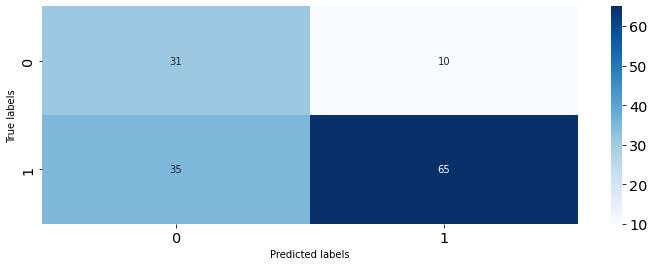

In [81]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

- In 141 results avalueted, we have:
 - TN - 32 true negative, the algorithm predict correctly the negative results;
 - TP - 63 true negative, the algorithm predict correctly the positive results;
 - FN - 37 false negative, the algorithm predict incorrectly the negative results;
 - FP - 9 false negative, the algorithm predict incorrectly the positive results;

- With the confusion matrix is possible to calculate the quality of classification through Accuracy, Recall, Precision and F-Score, for instance.
- Nevertheless we can calculate the metrics using the elements from confusion matrix (TN,TP,FN,FP), the sklearn already has ready formulas.


In [82]:
#Accuracy
Acc = round((accuracy_score(y_test,y_pred)*100),2)
Acc
#Its a metric that the closer to 100 better

68.09

ROC curve - Receiver Operating Characteristics
- It is a graphical representation of sensibility (rate of true positive) versus especificity (rate of false positive)

In [83]:
#to calculate ROC curve we need the probability of positive class:
prob_y_pred = model.predict_proba(x_test_pad)[:,1]

In [84]:
prob_y_pred[:10]

array([0.24491131, 0.49738236, 0.50953441, 0.90209011, 0.45128447,
       0.46296431, 0.39412236, 0.23836775, 0.40722096, 0.91838938])

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, prob_y_pred)

The values is represented for :
- FPR (False Positive Rate): An array of false positive rates for different cutoff points.
- TPR (True Positive Rate): An array of true positive rates for different cutoff points.
- thresholds: An array of threshold values corresponding to the cutoff points.

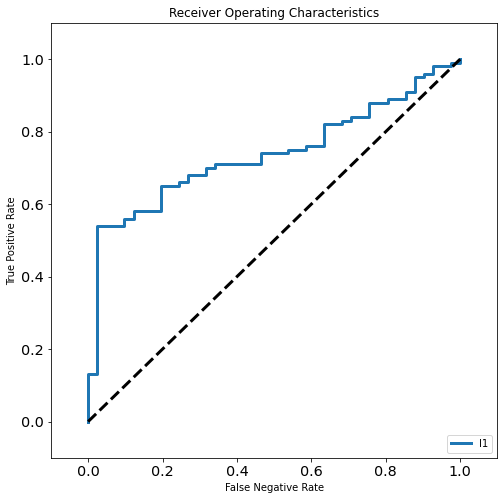

In [86]:
#Plot the ROC curve
fig =plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristics')

#Plot ROC Curve
plt.plot(fpr,tpr,label='l1')
plt.legend(loc='lower right')

#Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels 
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Negative Rate')
plt.show()

In [87]:
#  AUC (Area Under The Curve) - global metric
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.7030487804878048


In [88]:
#AUC - Area uder curve 
auc1 = auc(fpr, tpr)
print(auc1)

0.7395121951219512


- The interpretation of ROC curve depends of AUC value: The larger the area under the curve, the better the performance of the model in classifying the samples into positive and negative classes
- The best value is close to 1, as we obtained 0.73 is cosidered a good value.
- In addition, the ROC curve can help determine the optimal cutoff point for the model. A higher point on the ROC curve represents a cutoff point that maximizes both sensitivity and specificity, while a lower point represents a cutoff point that favors one of the two over the other. 

New version

- We need to build the model again with the best hyperparameters.
- It is necessary because the final version must not have the GridSearchCV

In [89]:
model_v1 = LogisticRegression(C = 1)
model_v1.fit(x_train_pad,y_train_bal)

LogisticRegression(C=1)

Feature Importance
- It is important to determinate the variables that most contribuited for the model

In [90]:
ind = np.argsort(-abs(model_v1.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in x.columns[ind]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
total_bilirubin
alamine_aminotransferase
aspartate_aminotransferase
albumin
total_proteins
age
gender
alkaline_phosphotase
ratio_albumin_and_globulin_ratio


In [91]:
# Create a dataframe to recieve the metrics of each model:
df_models = pd.DataFrame()

In [92]:
dict_model_v1 = {'Nome': 'model_v1', 
                  'Algoritmo': 'Logistic Regression', 
                  'ROC_AUC Score': roc_auc,
                  'AUC Score': auc1,
                  'Accuracy': Acc}

In [93]:
# Add dict in the dataframe
df_models = df_models.append(dict_model_v1, ignore_index = True)

In [94]:
print(df_models)

       Nome            Algoritmo  ROC_AUC Score  AUC Score  Accuracy
0  model_v1  Logistic Regression       0.703049   0.739512     68.09


**2. Random Forest**

In [95]:
#Define hyperparameters

In [96]:
p2 = {'criterion':['gini','entropy','log_loss'],
     'splitter':['best','random'],
     'max_depth':[2,3,4,5,6,7],
     'min_samples_split': [2, 3, 4, 5, 7], 
     'min_samples_leaf': [1, 2, 3, 4, 6]}

In [97]:
model2 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               p2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [98]:
model2.fit(x_train_pad,y_train_bal)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc')

In [99]:
model2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=7)

In [100]:
#predict train set results
y_pred1 = model2.predict(x_test_pad)

In [101]:
y_pred1[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [102]:
#Confusion Matrix 
cm1= confusion_matrix(y_test,y_pred1)
cm1

array([[26, 15],
       [40, 60]], dtype=int64)

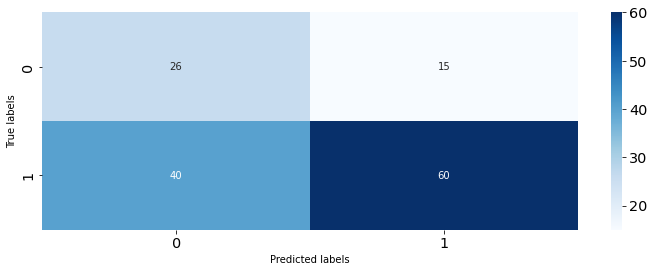

In [103]:
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [104]:
#Accuracy
Acc1= round((accuracy_score(y_test,y_pred1)*100),2)
Acc1
#Its a metric that the closer to 100 better

60.99

In [105]:
#to calculate ROC curve we need the probability of positive class:
prob_y_pred1 = model2.predict_proba(x_test_pad)[:,1]

In [106]:
#ROC 
fpr1, tpr1, thresholds = roc_curve(y_test, prob_y_pred1)

In [107]:
print(fpr1,tpr1)

[0.         0.2195122  0.26829268 0.36585366 0.3902439  0.70731707
 0.73170732 0.75609756 0.80487805 0.92682927 0.92682927 1.        ] [0.   0.54 0.55 0.6  0.62 0.71 0.75 0.75 0.76 0.89 0.91 1.  ]


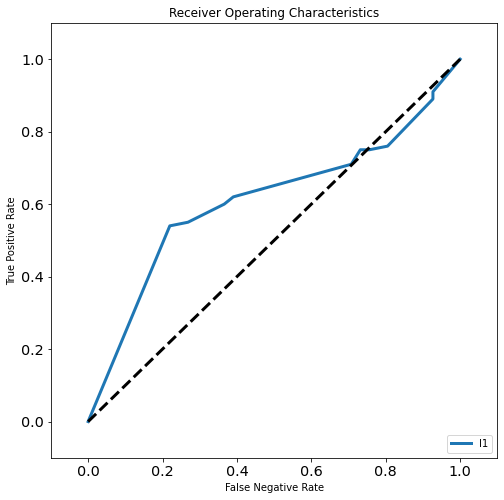

In [108]:
#Plot the ROC curve
fig =plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristics')

#Plot ROC Curve
plt.plot(fpr1,tpr1,label='l1')
plt.legend(loc='lower right')

#Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels 
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Negative Rate')
plt.show()

In [109]:
#  AUC (Area Under The Curve) - global metric
roc_auc1 = roc_auc_score(y_test, y_pred1)
print(roc_auc1)

0.6170731707317073


In [110]:
#AUC - Area under curve 
auc2= auc(fpr1,tpr1)

In [111]:
#New version
model2_1 = DecisionTreeClassifier(criterion='entropy',
                                  splitter='random',
                                  min_samples_split = 2, min_samples_leaf = 2, max_depth = 7)
model2_1.fit(x_train_pad,y_train_bal)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       splitter='random')

In [112]:
ind1 = np.argsort(-model2_1.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in x.columns[ind]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
total_bilirubin
alamine_aminotransferase
aspartate_aminotransferase
albumin
total_proteins
age
gender
alkaline_phosphotase
ratio_albumin_and_globulin_ratio


In [114]:
dict_model_v2 = {'Nome': 'model_v2', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc1,
                  'AUC Score': auc2,
                  'Accuracy': Acc1}

In [115]:
# Add dict in the dataframe
df_models = df_models.append(dict_model_v2, ignore_index = True)

In [116]:
print(df_models)

       Nome            Algoritmo  ROC_AUC Score  AUC Score  Accuracy
0  model_v1  Logistic Regression       0.703049   0.739512     68.09
1  model_v2        Decision Tree       0.617073   0.611098     60.99


**3. KNN**